In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import ml_metrics as metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
#load datasets
train_10k = pd.read_csv('train_downsampled_10k.csv')
train_11k = pd.read_csv('train_downsampled_11k.csv')
train_12k = pd.read_csv('train_downsampled_12k.csv')
train_13k = pd.read_csv('train_downsampled_13k.csv')
train_14k = pd.read_csv('train_downsampled_14k.csv')
train_15k = pd.read_csv('train_downsampled_15k.csv')

In [3]:
# Drop unnecessary features
train_10k = train_10k.drop(['date_time'], axis=1)
train_10k = train_10k.drop(['srch_ci'], axis=1)
train_10k = train_10k.drop(['srch_co'], axis=1)

train_11k = train_11k.drop(['date_time'], axis=1)
train_11k = train_11k.drop(['srch_ci'], axis=1)
train_11k = train_11k.drop(['srch_co'], axis=1)

train_12k = train_12k.drop(['date_time'], axis=1)
train_12k = train_12k.drop(['srch_ci'], axis=1)
train_12k = train_12k.drop(['srch_co'], axis=1)

train_13k = train_13k.drop(['date_time'], axis=1)
train_13k = train_13k.drop(['srch_ci'], axis=1)
train_13k = train_13k.drop(['srch_co'], axis=1)

train_14k = train_14k.drop(['date_time'], axis=1)
train_14k = train_14k.drop(['srch_ci'], axis=1)
train_14k = train_14k.drop(['srch_co'], axis=1)

train_15k = train_15k.drop(['date_time'], axis=1)
train_15k = train_15k.drop(['srch_ci'], axis=1)
train_15k = train_15k.drop(['srch_co'], axis=1)

In [4]:
#Split the data
train_new_10k = train_10k[((train_10k.year == 2013) | ((train_10k.year == 2014) & (train_10k.month < 8)))]
test_new_10k = train_10k[((train_10k.year == 2014) & (train_10k.month >= 8))]
train_new_11k = train_11k[((train_11k.year == 2013) | ((train_11k.year == 2014) & (train_11k.month < 8)))]
test_new_11k = train_11k[((train_11k.year == 2014) & (train_11k.month >= 8))]
train_new_12k = train_12k[((train_12k.year == 2013) | ((train_12k.year == 2014) & (train_12k.month < 8)))]
test_new_12k = train_12k[((train_12k.year == 2014) & (train_12k.month >= 8))]
train_new_13k = train_13k[((train_13k.year == 2013) | ((train_13k.year == 2014) & (train_13k.month < 8)))]
test_new_13k = train_13k[((train_13k.year == 2014) & (train_13k.month >= 8))]
train_new_14k = train_14k[((train_14k.year == 2013) | ((train_14k.year == 2014) & (train_14k.month < 8)))]
test_new_14k = train_14k[((train_14k.year == 2014) & (train_14k.month >= 8))]
train_new_15k = train_15k[((train_15k.year == 2013) | ((train_15k.year == 2014) & (train_15k.month < 8)))]
test_new_15k = train_15k[((train_11k.year == 2014) & (train_15k.month >= 8))]

In [5]:
test_new_10k = test_new_10k[test_new_10k.is_booking == 1]
test_new_11k = test_new_11k[test_new_11k.is_booking == 1]
test_new_12k = test_new_12k[test_new_12k.is_booking == 1]
test_new_13k = test_new_13k[test_new_13k.is_booking == 1]
test_new_14k = test_new_14k[test_new_14k.is_booking == 1]
test_new_15k = test_new_15k[test_new_15k.is_booking == 1]

In [6]:
X_train_new_10k = train_new_10k.drop(['hotel_cluster'], axis=1)
Y_train_new_10k = train_new_10k['hotel_cluster']
X_train_new_11k = train_new_11k.drop(['hotel_cluster'], axis=1)
Y_train_new_11k = train_new_11k['hotel_cluster']
X_train_new_12k = train_new_12k.drop(['hotel_cluster'], axis=1)
Y_train_new_12k = train_new_12k['hotel_cluster']
X_train_new_13k = train_new_13k.drop(['hotel_cluster'], axis=1)
Y_train_new_13k = train_new_13k['hotel_cluster']
X_train_new_14k = train_new_14k.drop(['hotel_cluster'], axis=1)
Y_train_new_14k = train_new_14k['hotel_cluster']
X_train_new_15k = train_new_15k.drop(['hotel_cluster'], axis=1)
Y_train_new_15k = train_new_15k['hotel_cluster']

In [7]:
X_test_new_10k = test_new_10k.drop(['hotel_cluster'], axis=1)
Y_test_new_10k = test_new_10k['hotel_cluster']
X_test_new_11k = test_new_11k.drop(['hotel_cluster'], axis=1)
Y_test_new_11k = test_new_11k['hotel_cluster']
X_test_new_12k = test_new_12k.drop(['hotel_cluster'], axis=1)
Y_test_new_12k = test_new_12k['hotel_cluster']
X_test_new_13k = test_new_13k.drop(['hotel_cluster'], axis=1)
Y_test_new_13k = test_new_13k['hotel_cluster']
X_test_new_14k = test_new_14k.drop(['hotel_cluster'], axis=1)
Y_test_new_14k = test_new_14k['hotel_cluster']
X_test_new_15k = test_new_15k.drop(['hotel_cluster'], axis=1)
Y_test_new_15k = test_new_15k['hotel_cluster']

In [8]:
def mean_average_precision(y_test, y_pred_proba):
    y_pred_k = np.array([y_pred_proba[i].argsort()[-5:][::-1] 
        for i in range(len(y_test))]) # k=5 most likely predicted classes for each input
    map_score = metrics.mapk(y_test.values[np.newaxis].T, y_pred_k, 5)
    return map_score

In [9]:
rfc_10k = RandomForestClassifier(n_estimators=23, random_state=42)
rfc_11k = RandomForestClassifier(n_estimators=23, random_state=42)
rfc_12k = RandomForestClassifier(n_estimators=23, random_state=42)
rfc_13k = RandomForestClassifier(n_estimators=23, random_state=42)
rfc_14k = RandomForestClassifier(n_estimators=23, random_state=42)
rfc_15k = RandomForestClassifier(n_estimators=23, random_state=42)

In [10]:
rfc_10k.fit(X_train_new_10k, Y_train_new_10k)
rfc_11k.fit(X_train_new_11k, Y_train_new_11k)
rfc_12k.fit(X_train_new_12k, Y_train_new_12k)
rfc_13k.fit(X_train_new_13k, Y_train_new_13k)
rfc_14k.fit(X_train_new_14k, Y_train_new_14k)
rfc_15k.fit(X_train_new_15k, Y_train_new_15k)

RandomForestClassifier(n_estimators=23, random_state=42)

In [11]:
rfc_pred_10k = rfc_10k.predict(X_test_new_10k)
rfc_pred_11k = rfc_11k.predict(X_test_new_11k)
rfc_pred_12k = rfc_12k.predict(X_test_new_12k)
rfc_pred_13k = rfc_13k.predict(X_test_new_13k)
rfc_pred_14k = rfc_14k.predict(X_test_new_14k)
rfc_pred_15k = rfc_15k.predict(X_test_new_15k)

In [12]:
rfc_prob_10k = rfc_10k.predict_proba(X_test_new_10k)
rfc_prob_11k = rfc_11k.predict_proba(X_test_new_11k)
rfc_prob_12k = rfc_12k.predict_proba(X_test_new_12k)
rfc_prob_13k = rfc_13k.predict_proba(X_test_new_13k)
rfc_prob_14k = rfc_14k.predict_proba(X_test_new_14k)
rfc_prob_15k = rfc_15k.predict_proba(X_test_new_15k)

In [13]:
print(rfc_prob_10k)

[[0.         0.         0.19565217 ... 0.         0.         0.01086957]
 [0.         0.         0.04347826 ... 0.04347826 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.08695652 ... 0.04347826 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [14]:
accuracy_10k = accuracy_score(Y_test_new_10k, rfc_pred_10k)
print('Accuracy', accuracy_10k)
accuracy_11k = accuracy_score(Y_test_new_11k, rfc_pred_11k)
print('Accuracy', accuracy_11k)
accuracy_12k = accuracy_score(Y_test_new_12k, rfc_pred_12k)
print('Accuracy', accuracy_12k)
accuracy_13k = accuracy_score(Y_test_new_13k, rfc_pred_13k)
print('Accuracy', accuracy_13k)
accuracy_14k = accuracy_score(Y_test_new_14k, rfc_pred_14k)
print('Accuracy', accuracy_14k)
accuracy_15k = accuracy_score(Y_test_new_15k, rfc_pred_15k)
print('Accuracy', accuracy_15k)

Accuracy 0.10468360005872852
Accuracy 0.11069296651959512
Accuracy 0.11408909815284317
Accuracy 0.11120840630472854
Accuracy 0.10685380596250384
Accuracy 0.38164251207729466


In [15]:
map_10k = mean_average_precision(Y_test_new_10k, rfc_prob_10k)
print("Mean Average Precision@5", map_10k)
map_11k = mean_average_precision(Y_test_new_11k, rfc_prob_11k)
print("Mean Average Precision@5", map_11k)
map_12k = mean_average_precision(Y_test_new_12k, rfc_prob_12k)
print("Mean Average Precision@5", map_12k)
map_13k = mean_average_precision(Y_test_new_13k, rfc_prob_13k)
print("Mean Average Precision@5", map_13k)
map_14k = mean_average_precision(Y_test_new_14k, rfc_prob_14k)
print("Mean Average Precision@5", map_14k)
map_15k = mean_average_precision(Y_test_new_15k, rfc_prob_15k)
print("Mean Average Precision@5", map_15k)

Mean Average Precision@5 0.17559584985073165
Mean Average Precision@5 0.18207241110822736
Mean Average Precision@5 0.18394100366211918
Mean Average Precision@5 0.18068447168709867
Mean Average Precision@5 0.17539528053819622
Mean Average Precision@5 0.42975584279932105


In [16]:
mapk_scores = [map_10k, map_11k, map_12k, map_13k, map_14k, map_15k]

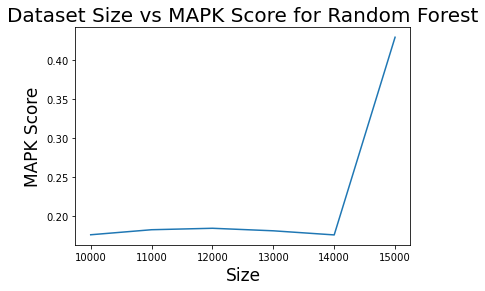

In [17]:
dataset_size = [10000, 11000, 12000, 13000, 14000, 15000]

plt.plot(dataset_size,mapk_scores)
plt.title("Dataset Size vs MAPK Score for Random Forest",fontsize=20)
plt.xlabel("Size",fontsize=17)
plt.ylabel("MAPK Score",fontsize=17)
plt.show()

In [18]:
map_score = make_scorer(mean_average_precision, needs_proba=True, greater_is_better=True)

In [19]:
param_grid_rfc = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

In [20]:
rfc = RandomForestClassifier(n_estimators=23, random_state=42)
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, scoring=map_score, cv=3)
rfc_grid.fit(X_train_new_15k, Y_train_new_15k)

C:\Users\kelly\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kelly\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kelly\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\kelly\anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\kelly\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\kelly\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=

C:\Users\kelly\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kelly\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kelly\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\kelly\anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\kelly\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\kelly\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=23, random_state=42),
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(mean_average_precision, needs_proba=True))

In [21]:
print(rfc_grid.best_params_)

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [23]:
###### y_test_grid = rfc_grid.predict(X_test_new_15k)
y_test_proba_grid = rfc_grid.predict_proba(X_test_new_15k)
accuracy_grid = accuracy_score(Y_test_new_15k, y_test_grid)
print('Accuracy after gridsearch', accuracy_grid)
map_grid = mean_average_precision(Y_test_new_15k, y_test_proba_grid)
print("Mean Average Precision@5 after gridsearch", map_grid)

Accuracy after gridsearch 0.36414675545110325
Mean Average Precision@5 after gridsearch 0.4454345649997824
